<a href="https://colab.research.google.com/github/nagamani0604/Nagamani_INFO5731_Fall2024/blob/main/Somireddy_Nagamani_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


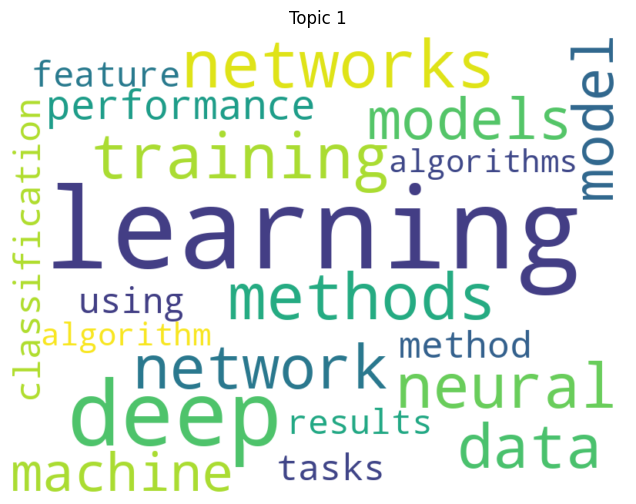

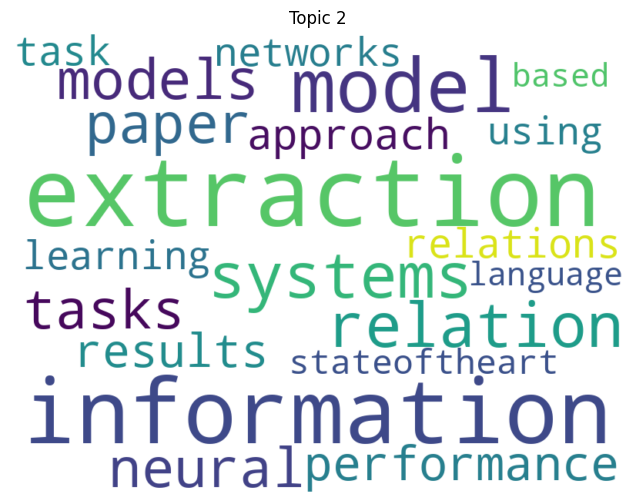

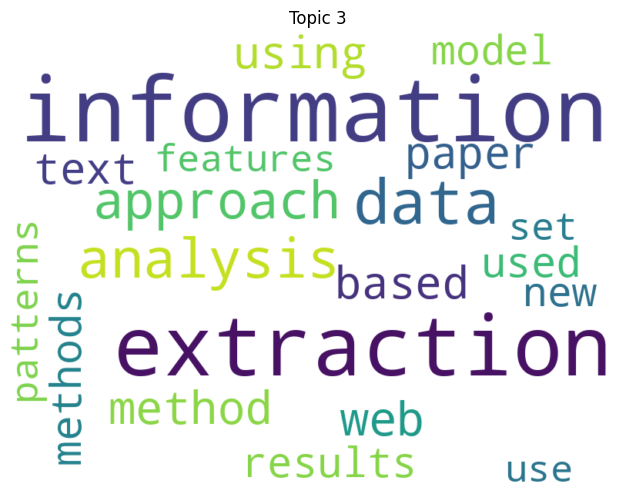

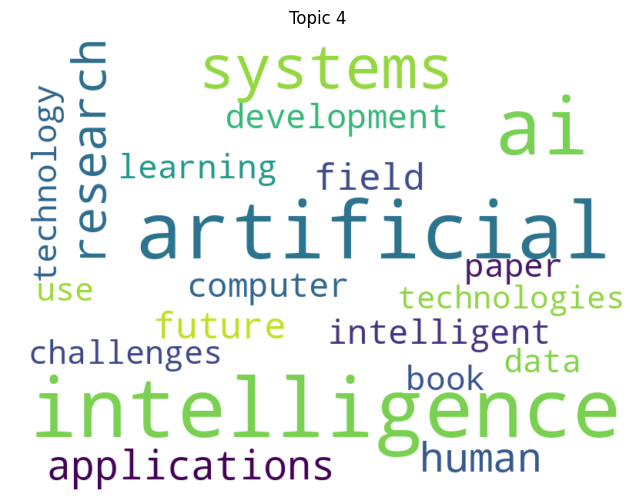

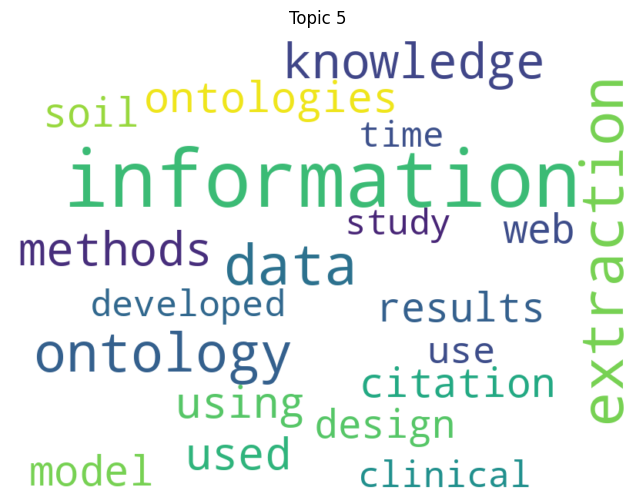

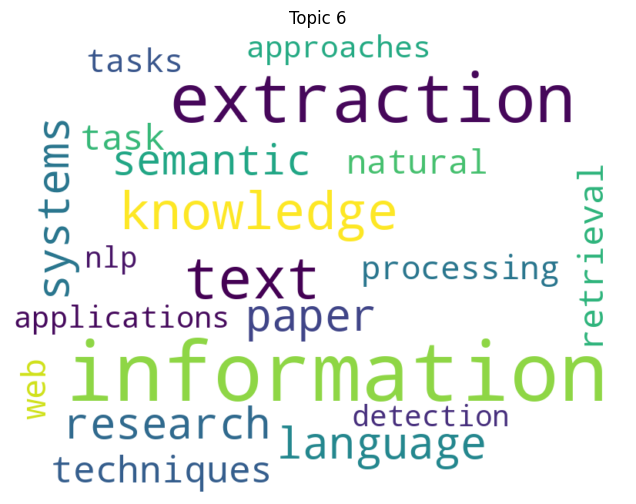

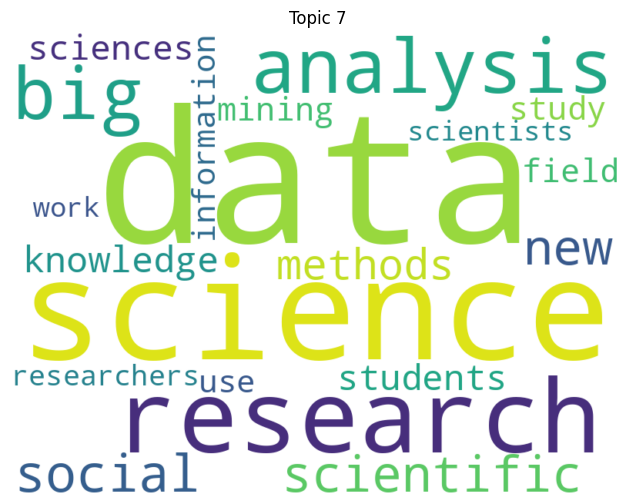

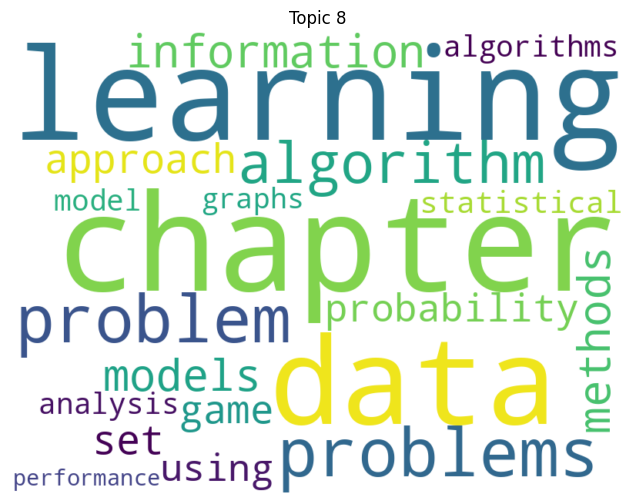

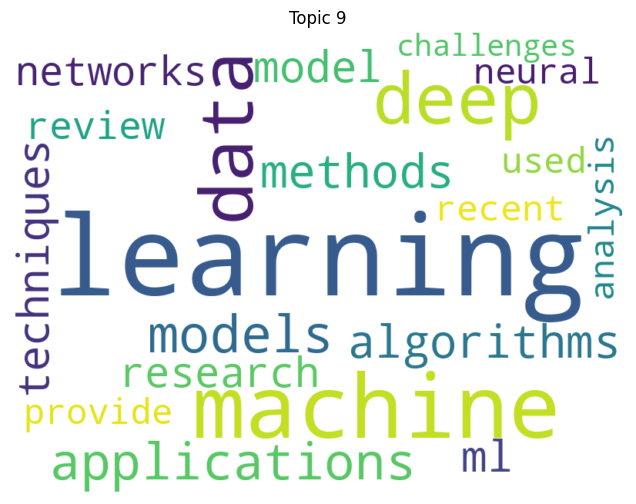

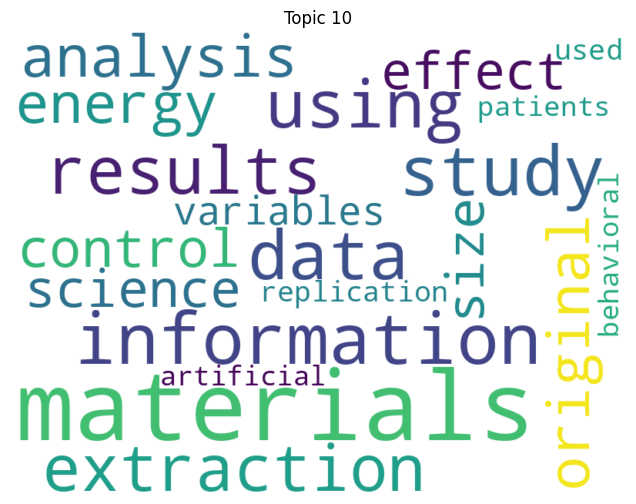


Topic 1:
learning, deep, networks, methods, training, neural, data, network, models, model
Summary: This topic seems to focus on machine learning and data science concepts.

Topic 2:
extraction, information, model, systems, relation, models, paper, neural, tasks, performance
Summary: This topic seems to focus on machine learning and data science concepts.

Topic 3:
information, extraction, data, analysis, approach, web, method, using, based, paper
Summary: This topic seems to focus on machine learning and data science concepts.

Topic 4:
intelligence, artificial, ai, systems, research, human, applications, future, field, intelligent
Summary: This topic might focus on general research or analysis.

Topic 5:
information, extraction, data, ontology, knowledge, methods, used, using, ontologies, model
Summary: This topic seems to focus on machine learning and data science concepts.

Topic 6:
information, extraction, text, knowledge, paper, systems, language, research, semantic, techniques


In [28]:
!pip install wordcloud
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

# Step 1: Load the dataset
file_path = '/content/papers_abstracts.csv'
data = pd.read_csv(file_path)

# Step 2: Preprocess the text data
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        tokens = text.split()
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    return ''

data['Abstract'] = data['Abstract'].fillna('')

data['Processed_Abstract'] = data['Abstract'].apply(preprocess_text)

# Step 3: Convert text to document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['Processed_Abstract'])

# Step 4: Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=10, random_state=42)  # I choose 10 topics
lda.fit(dtm)

# Step 5: Visualize topics using WordCloud
words = vectorizer.get_feature_names_out()

# Display a word cloud for each topic
for i, topic in enumerate(lda.components_):
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(
        background_color='white',
        width=800,
        height=600,
        max_words=20
    ).generate_from_frequencies(dict(zip(words, topic)))

    plt.title(f"Topic {i + 1}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Step 6: Print top words for each topic
# Print the top words and a simple description of each topic
for i, topic in enumerate(lda.components_):
    print(f"\nTopic {i + 1}:")
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [words[i] for i in top_words_idx]
    print(", ".join(top_words))

    # Summarize the topic based on top words
    if 'data' in top_words or 'model' in top_words:
        print(f"Summary: This topic seems to focus on machine learning and data science concepts.")
    elif 'method' in top_words or 'approach' in top_words:
        print(f"Summary: This topic appears to discuss various methods or approaches in research.")
    else:
        print(f"Summary: This topic might focus on general research or analysis.")




# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [26]:
!pip install scikit-learn pandas numpy nltk textblob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from textblob import TextBlob
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv("/content/papers_abstracts.csv")

# Data Preprocessing: Remove rows with missing 'Abstract' data
data = data.dropna(subset=["Abstract"])

# Text preprocessing function
def preprocess_text(text):
    """
    This function preprocesses the text by:
    - Lowercasing all the text to ensure uniformity.
    - Removing any special characters, numbers, or punctuation to focus only on meaningful words.
    """
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

data['Processed_Abstract'] = data['Abstract'].apply(preprocess_text)

def classify_sentiment(text):
    """
    This function classifies the sentiment based on the text's polarity score from TextBlob:
    - Positive sentiment if polarity > 0
    - Negative sentiment if polarity < 0
    - Neutral sentiment if polarity == 0
    """
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['Processed_Abstract'].apply(classify_sentiment)

# Feature Selection:
# The key feature used in sentiment classification is the 'Processed_Abstract' column, which contains the cleaned text.
# The target variable is 'Sentiment', which contains the sentiment labels (positive, negative, or neutral).
# The text will be transformed into numerical features using the TF-IDF vectorizer.

# Split the data into training and testing sets (80% train, 20% test)
X = data['Processed_Abstract']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}

for model_name, model in models.items():
    print(f"\nTraining and evaluating: {model_name}")

    # Create a pipeline with TF-IDF Vectorizer and the model
    # TF-IDF is chosen because it helps to weight words based on their importance in the text corpus
    # allowing us to focus on significant words while downplaying frequent common words.
    pipeline = make_pipeline(TfidfVectorizer(), model)

    # Perform cross-validation (5-fold) to evaluate model performance during training
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation Accuracy: {np.mean(cv_scores):.4f}")

    # Train the model and make predictions on the test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics: Accuracy, Precision, Recall, and F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")



Training and evaluating: Logistic Regression
Cross-validation Accuracy: 0.8856
Test Accuracy: 0.8936
Precision: 0.8974
Recall: 0.8936
F1 Score: 0.8687

Training and evaluating: Support Vector Machine
Cross-validation Accuracy: 0.9333
Test Accuracy: 0.9528
Precision: 0.9539
Recall: 0.9528
F1 Score: 0.9494


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Missing values in training data:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Missing values in testing data:
 Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

Summary Statistics for Training Data:
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
2

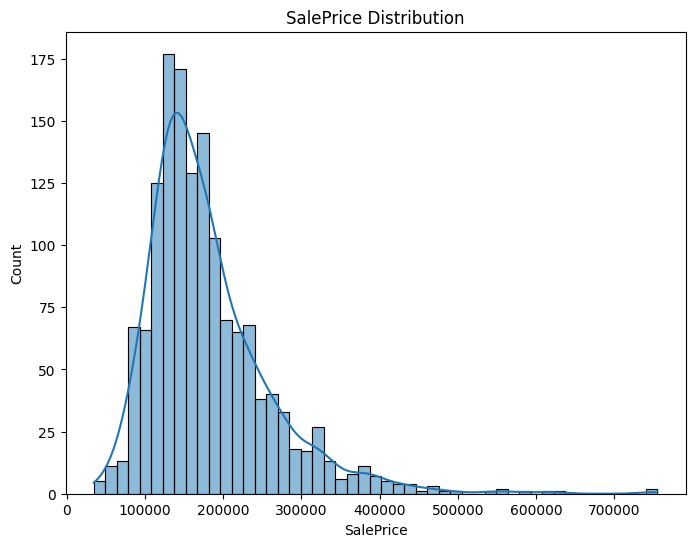

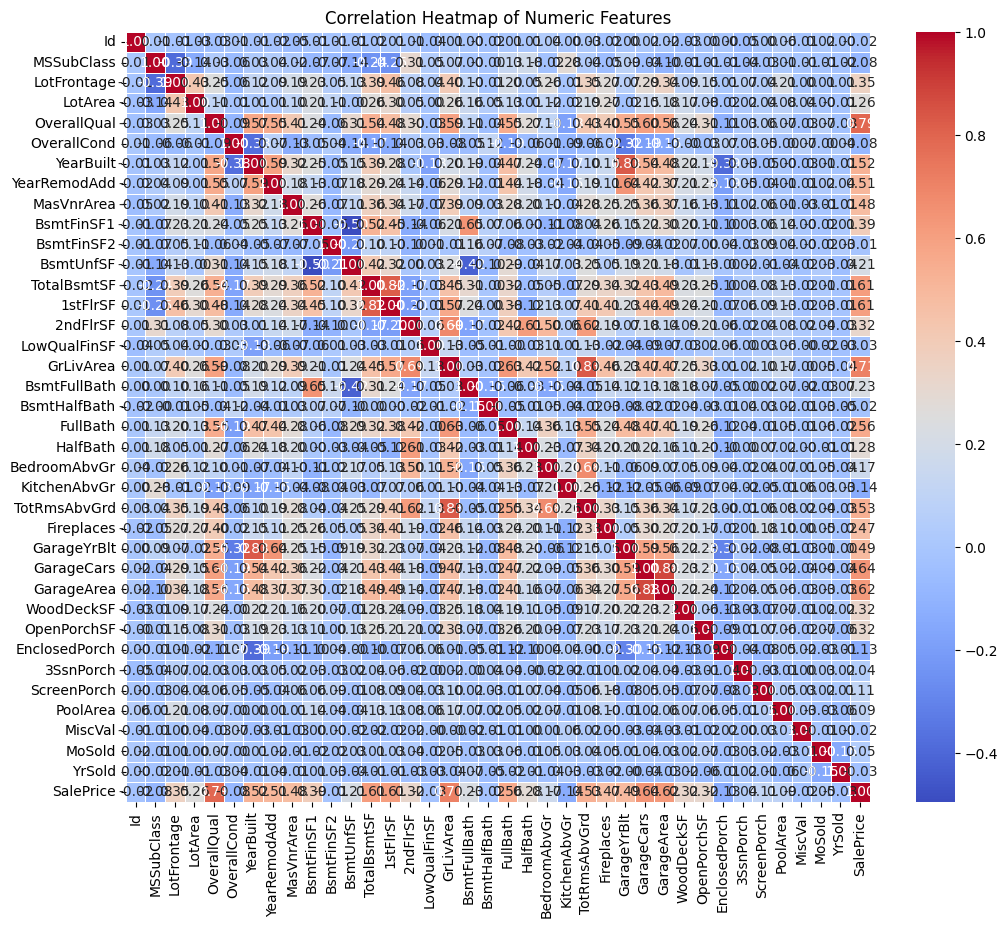

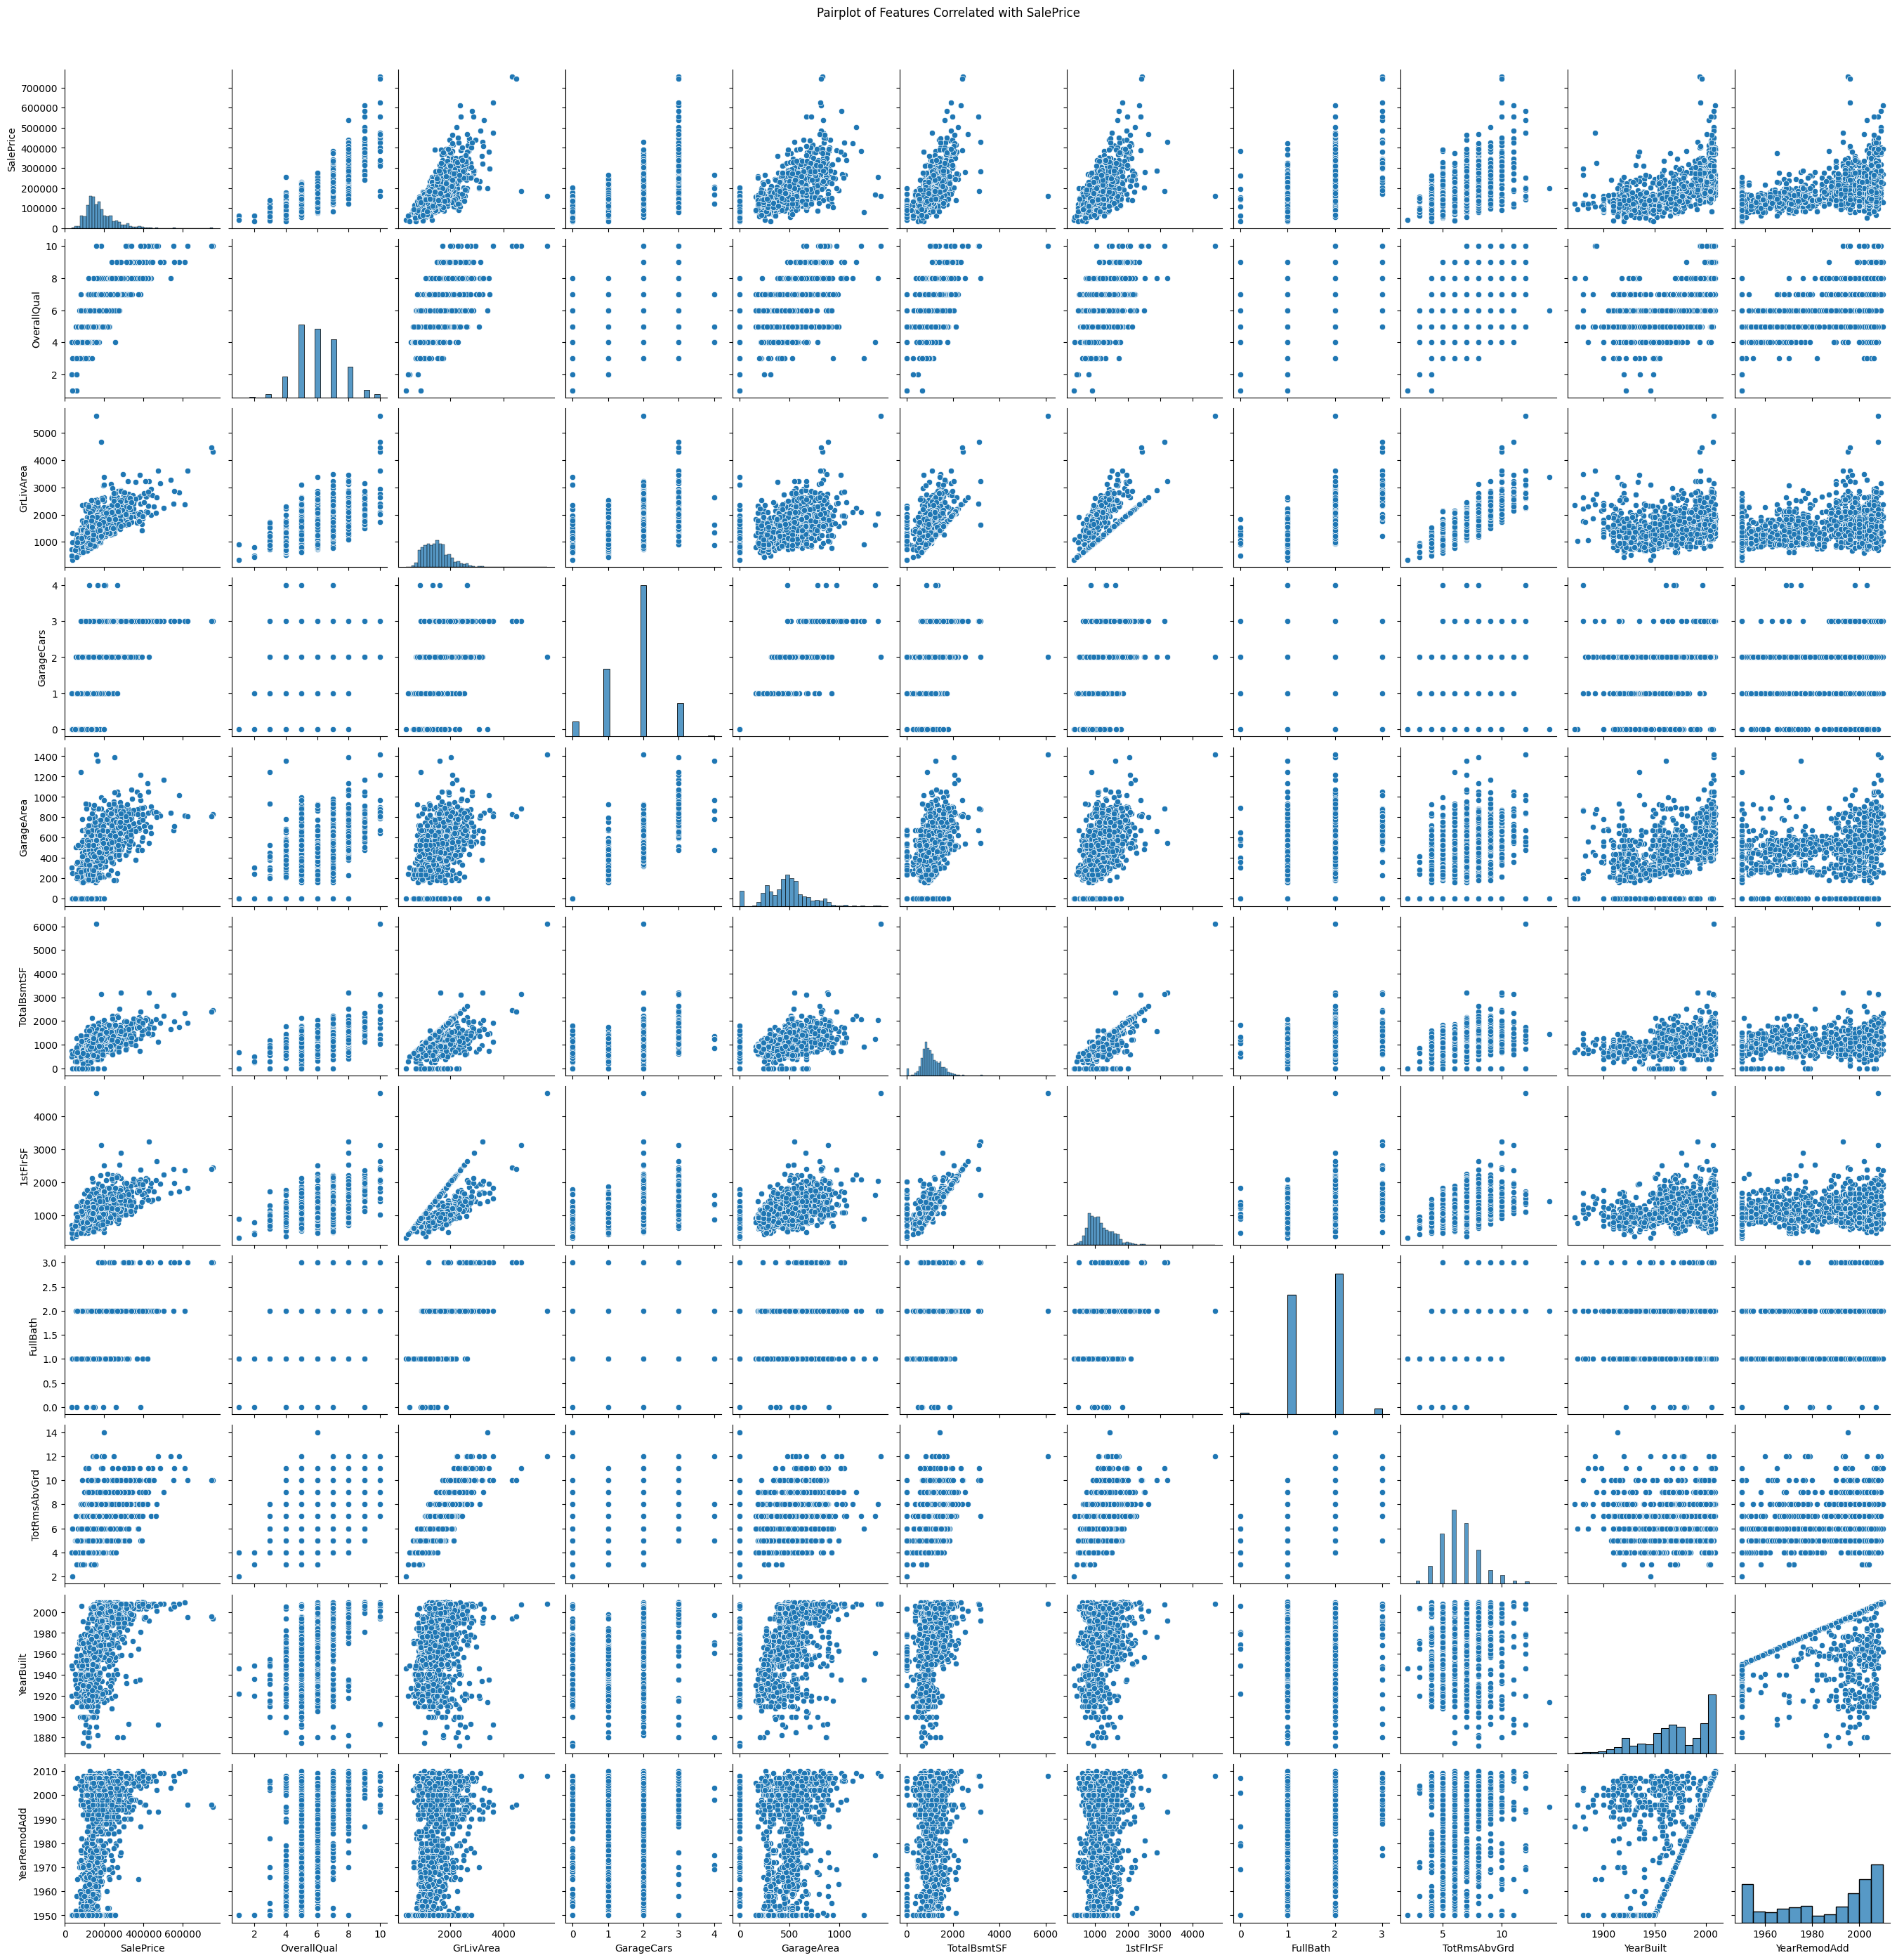


Features Correlated with SalePrice:
 SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv') # At this stage, the data is loaded, but you haven’t selected any specific features yet.

print("Missing values in training data:\n", train_data.isnull().sum())
print("Missing values in testing data:\n", test_data.isnull().sum())
print("\nSummary Statistics for Training Data:\n", train_data.describe())

plt.figure(figsize=(8, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()

numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = train_data[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

high_corr_features = correlation_matrix['SalePrice'].sort_values(ascending=False)
top_corr_features = high_corr_features[high_corr_features > 0.5].index.tolist()
sns.pairplot(train_data[top_corr_features], kind="scatter")
plt.suptitle('Pairplot of Features Correlated with SalePrice', y=1.02)
plt.show()

print("\nFeatures Correlated with SalePrice:\n", high_corr_features)

#After calculating the correlation matrix and identifying the most correlated features with SalePrice, i need to create a list of features to use in  model.
selected_features = high_corr_features[abs(high_corr_features) > 0.5].index.tolist()
print("\nSelected Features for Model (correlation > 0.5 or < -0.5):", selected_features)

X_train_full = train_data[selected_features].drop(columns=['SalePrice'])
y_train_full = train_data['SalePrice']

selected_features_in_test = [col for col in selected_features if col in test_data.columns]
X_test = test_data[selected_features_in_test]

#After selecting the features, the code for missing value imputation, categorical feature encoding, and scaling can remain the same, as it will be applied to the selected features.


numeric_imputer = SimpleImputer(strategy='mean')
X_train_full = numeric_imputer.fit_transform(X_train_full)
X_test = numeric_imputer.transform(X_test)

categorical_cols = train_data.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols] = categorical_imputer.fit_transform(train_data[categorical_cols])
test_data[categorical_cols] = categorical_imputer.transform(test_data[categorical_cols])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
train_encoded = encoder.fit_transform(train_data[categorical_cols])
test_encoded = encoder.transform(test_data[categorical_cols])

train_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
test_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

X_train_full = pd.concat([pd.DataFrame(X_train_full), train_encoded], axis=1)
X_test = pd.concat([pd.DataFrame(X_test), test_encoded], axis=1)

X_train_full.columns = X_train_full.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

#Once features are selected,  model training steps will remain the same.
#AS i defined X_train_full, X_valid, y_train_full, and y_valid as part of the feature selection and data split. These will now only include the selected features.


X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_valid_pred = model.predict(X_valid_scaled)
print("\nValidation RMSE:", np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print("Validation R^2 Score:", r2_score(y_valid, y_valid_pred))

test_data_predictions = model.predict(X_test_scaled)

output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_data_predictions})
output.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'.")


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [2]:
#1. For sentiment analysis, I selected DistilBERT, a distilled version of the BERT (Bidirectional Encoder Representations from Transformers) model
#DistilBERT is pre-trained on the BookCorpus (800 million words from unpublished books) and English Wikipedia (2.5 billion words), just like the original BERT.
#DistilBERT has 66 million parameters, which is significantly smaller than the original BERT model, which contains 110 million parameters.
#DistilBERT achieves this reduction in size by using a distillation technique during training, which retains most of the performance while cutting down the number of parameters and improving computational efficiency.
#DistilBERT is not fine-tuned in this case. It is used in its general pre-trained form for zero-shot classification tasks, such as sentiment analysis. DistilBERT can be fine-tuned for specific downstream tasks like sentiment analysis, named entity recognition (NER), or question answering, by training it on task-specific labeled data.
#However, in this case, we are using it in a zero-shot setting without additional task-specific fine-tuning.
#2.
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

file_path = '/content/sentiment_data.csv'
data = pd.read_csv(file_path)

sampled_data = data.sample(n=100, random_state=42)
sampled_data['clean_text'] = sampled_data['clean_text'].fillna('').str.strip()
sampled_data = sampled_data[sampled_data['clean_text'].str.len() > 0]

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

candidate_labels = ["positive", "negative"]

def tokenize_data(texts, batch_size=16):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)
    return inputs

def get_predictions(inputs):
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=-1)
        predictions = torch.argmax(probabilities, dim=-1)
    return predictions

def create_dataloader(texts, batch_size=16):
    inputs = tokenize_data(texts, batch_size)
    dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])
    return DataLoader(dataset, batch_size=batch_size)

predictions = []
batch_size = 16
dataloader = create_dataloader(sampled_data['clean_text'].tolist(), batch_size)

for batch in tqdm(dataloader, desc="Processing batches"):
    input_ids, attention_mask = batch
    inputs = {'input_ids': input_ids.to(device), 'attention_mask': attention_mask.to(device)}
    batch_predictions = get_predictions(inputs)
    predictions.extend(batch_predictions.cpu().numpy())

predicted_sentiment = [candidate_labels[pred] for pred in predictions]

sampled_data['predicted_sentiment'] = predicted_sentiment

sampled_data = sampled_data.dropna(subset=['predicted_sentiment'])

true_labels = sampled_data['sentiment']
predicted_labels = sampled_data['predicted_sentiment']

accuracy = accuracy_score(true_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


#3.Advantages: DistilBERT has fewer parameters (66 million) compared to the original BERT (110 million).
#As a result of fewer parameters, DistilBERT is faster at processing inputs, which can be critical when dealing with large datasets or requiring low-latency predictions.
#DistilBERT is designed to retain most of BERT's accuracy while reducing its resource consumption.
#Disadvantages: The main disadvantage of DistilBERT is the potential loss in accuracy compared to the full BERT model.
#While it is designed to maintain a good performance level with fewer parameters, for very specific or nuanced tasks, BERT might outperform DistilBERT.
#While DistilBERT can perform well in a zero-shot setting for sentiment analysis, task-specific fine-tuning could improve performance further.
#In sentiment analysis tasks, DistilBERT gives an overall sentiment label ("positive" or "negative"), but it does not provide finer insights into the intensity or complexity of the sentiment.
#Challenges: While DistilBERT is faster than BERT, processing a large dataset (especially without batching or with limited system resources) can still be slow.
#Using DistilBERT in a zero-shot setting means that it does not receive any task-specific training or fine-tuning.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing batches: 100%|██████████| 5/5 [01:27<00:00, 17.57s/it]

Accuracy: 0.39
Precision: 0.15
Recall: 0.39
F1 Score: 0.22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
